# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# %pip install config

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import csv
import json
import config as key

# Import API keys
from api_keys import weather_api_key

#weather information
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
city_df = pd.read_csv("../cities.csv")
city_random = city_df.sample(500)
cities = city_random["City"].tolist()
cities = [city.capitalize() for city in cities]
# cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Request Weather Info
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create Lists to Store Data
town = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []

for city in cities:
    print(f"Proccessing Record {city}")
    
    response = requests.get(url + city + "&units=imperial&appid=" + weather_api_key).json()
    
    try:
        town.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
    except KeyError:
        print("Nada")

Proccessing Record Souillac
Proccessing Record Labuan
Proccessing Record Ishigaki
Proccessing Record Villaviciosa
Proccessing Record Araouane
Proccessing Record Lockhart
Proccessing Record Fort frances
Proccessing Record La esperanza
Proccessing Record Hakkari
Proccessing Record Morondava
Proccessing Record Katobu
Proccessing Record Zhigansk
Proccessing Record Mocuba
Proccessing Record Bolobo
Proccessing Record Melfi
Proccessing Record Yabrud
Proccessing Record Moses lake
Proccessing Record Arroyo
Proccessing Record Kieta
Proccessing Record Burns lake
Proccessing Record Banjar
Proccessing Record Qaanaaq
Proccessing Record La libertad
Proccessing Record Tiksi
Proccessing Record Trat
Proccessing Record Vitim
Proccessing Record Andradas
Proccessing Record Santa maria
Proccessing Record Gunjur
Proccessing Record Tamworth
Proccessing Record Xam nua
Proccessing Record Maniitsoq
Proccessing Record Union
Proccessing Record Zhezkazgan
Proccessing Record La ronge
Proccessing Record Alyangula
Pro

Proccessing Record Pampierstad
Proccessing Record Naryan-mar
Proccessing Record Tasiilaq
Proccessing Record Dong xoai
Proccessing Record Lahaina
Proccessing Record Jiuquan
Proccessing Record High prairie
Proccessing Record Le port
Proccessing Record Iwanai
Proccessing Record Birjand
Proccessing Record Okha
Proccessing Record Chunhuhub
Proccessing Record Kruisfontein
Proccessing Record Chauk
Proccessing Record Hulan ergi
Proccessing Record West wendover
Proccessing Record Tongren
Proccessing Record Kokstad
Proccessing Record Ayan
Proccessing Record Namibe
Proccessing Record Fort nelson
Proccessing Record Veraval
Proccessing Record Takoradi
Proccessing Record Dunedin
Proccessing Record Nagua
Proccessing Record Isangel
Proccessing Record Aitape
Proccessing Record Chuy
Proccessing Record Padang
Proccessing Record Provideniya
Proccessing Record Puerto escondido
Proccessing Record San patricio
Proccessing Record Champoton
Proccessing Record Paraiso
Proccessing Record Umtata
Proccessing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Compile and Create DataFrame
weather_dict = {
    "City": town,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind}
weather_data = pd.DataFrame(weather_dict)
weather_data = weather_data.drop_duplicates(subset='City', keep="first")

# Save File to CSV
weather_data.to_csv("output_data/Weather_Data.csv", index=False, header=True)

# Show DataFrame
weather_data

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Souillac,-20.52,57.52,73.40,64,40,17.22
1,Labuan,5.28,115.24,87.40,66,75,3.36
2,Ishigaki,24.34,124.16,77.00,100,75,17.22
3,Villaviciosa,43.48,-5.44,56.73,82,100,4.00
4,Araouane,18.90,-3.53,96.94,24,7,6.91
...,...,...,...,...,...,...,...
495,Paita,-5.09,-81.11,65.35,85,7,11.16
496,Darhan,49.49,105.92,55.06,66,100,0.96
497,Bjørnevatn,69.67,29.98,57.20,58,75,33.33
498,Nador,35.17,-2.93,74.23,60,3,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

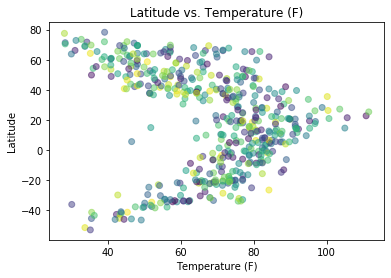

In [5]:
# Scatter Plot Temperature (F) vs. Latitude
    
# Define Variables
x0 = weather_data["Temperature (F)"]
y = weather_data["Latitude"]
N = len(weather_data["City"].value_counts())
colors = np.random.rand(N)

# Create Plot and Labels
plt.scatter(x0, y, c=colors, alpha=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)")

# Save Plot as PNG
plt.savefig("output_data/Temp_Lat.png")

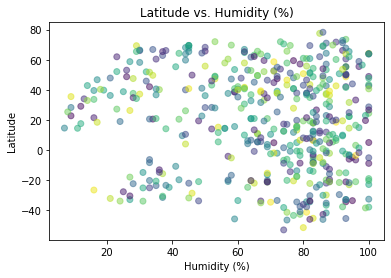

In [6]:
# Scatter Plot Humidity (%) vs. Latitude

# Define New Variables
x1 = weather_data["Humidity (%)"]

# Create Plot and Labels
plt.scatter(x1, y, c=colors, alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity (%)")

# Save Plot as PNG
plt.savefig("output_data/Hum_Lat.png")

#### Latitude vs. Cloudiness Plot

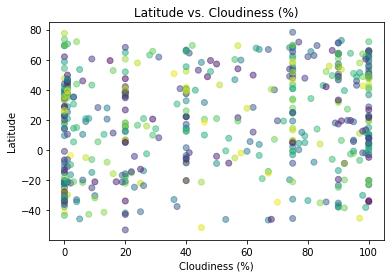

In [7]:
# Scatter Plot Cloudiness (%) vs. Latitude

# Define New Variables
x2 = weather_data["Cloudiness (%)"]

# Create Plot and Labels
plt.scatter(x2, y, c=colors, alpha=0.5)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness (%)")

# Save Plot as PNG
plt.savefig("output_data/Cloud_Lat.png")

#### Latitude vs. Wind Speed Plot

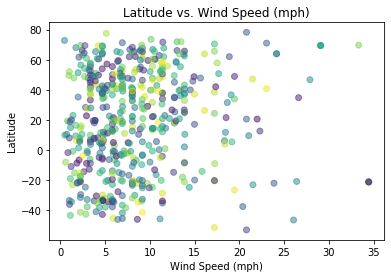

In [8]:
# Scatter Plot Wind Speed (mph) vs. Latitude

# Define New Variables
x3 = weather_data["Wind Speed (mph)"]

# Create Plot and Labels
plt.scatter(x3, y, c=colors, alpha=0.5)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)")

# Save Plot as PNG
plt.savefig("output_data/Wind_Lat.png")

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
north_lat = weather_data[y >= 0]
south_lat = weather_data[y < 0]

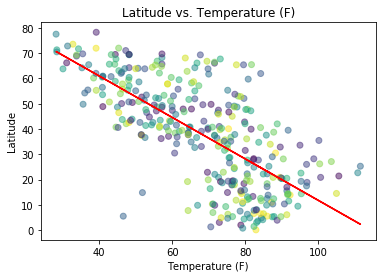

In [11]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (With Linear Regression) - Temperature (F) vs Latitude

# Define Variables
l_north = north_lat["Latitude"]
t_north = north_lat["Temperature (F)"]
N = len(north_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(t_north, l_north)
regress_values = t_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(t_north, l_north, c=colors, alpha=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)")

# Plot Linear Regression
plt.plot(t_north,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/North_Temp_Lat.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

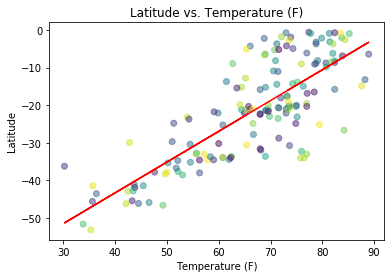

In [12]:
# Southern Hemisphere (With Linear Regression) - Temperature (F) vs Latitude

# Define Variables
l_south = south_lat["Latitude"]
t_south = south_lat["Temperature (F)"]
N = len(south_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(t_south, l_south)
regress_values = t_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(t_south, l_south, c=colors, alpha=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature (F)")

# Plot Linear Regression
plt.plot(t_south,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/South_Temp_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

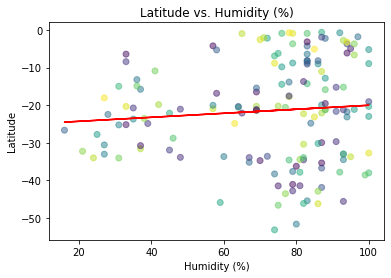

In [14]:
# Southern Hemisphere (With Linear Regression) - Humidity (%) vs Latitude

# Define Variables
l_south = south_lat["Latitude"]
h_south = south_lat["Humidity (%)"]
N = len(south_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(h_south, l_south)
regress_values = h_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(h_south, l_south, c=colors, alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Humidity (%)")

# Plot Linear Regression
plt.plot(h_south,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/South_Hum_Lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

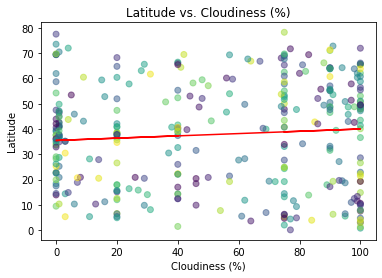

In [13]:

# Northern Hemisphere (With Linear Regression) - Cloudiness (%) vs Latitude

# Define Variables
l_north = north_lat["Latitude"]
c_north = north_lat["Cloudiness (%)"]
N = len(north_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(c_north, l_north)
regress_values = c_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(c_north, l_north, c=colors, alpha=0.5)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness (%)")

# Plot Linear Regression
plt.plot(c_north,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/North_Cloud_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

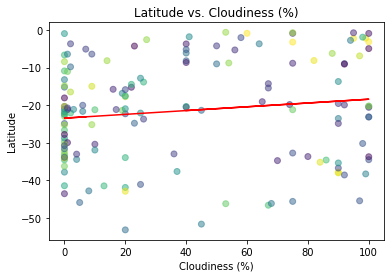

In [15]:
#Southern Hemisphere (With Linear Regression) - Cloudiness (%) vs Latitude

# Define Variables
l_south = south_lat["Latitude"]
c_south = south_lat["Cloudiness (%)"]
N = len(south_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(c_south, l_south)
regress_values = c_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(c_south, l_south, c=colors, alpha=0.5)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Cloudiness (%)")

# Plot Linear Regression
plt.plot(c_south,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/South_Cloud_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

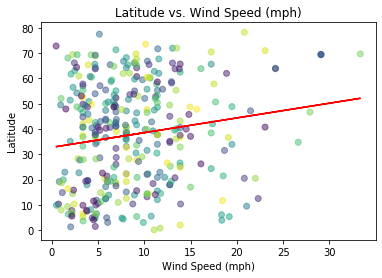

In [16]:
# Northern Hemisphere (With Linear Regression) - Wind Speed (mph) vs Latitude

#Define Variables
l_north = north_lat["Latitude"]
w_north = north_lat["Wind Speed (mph)"]
N = len(north_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(w_north, l_north)
regress_values = w_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(w_north, l_north, c=colors, alpha=0.5)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)")

# Plot Linear Regression
plt.plot(w_north,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/North_Wind_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

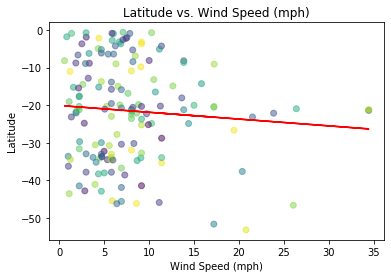

In [17]:
# Southern Hemisphere (With Linear Regression) - Wind Speed (mph) vs Latitude

#Define Variables
l_south = south_lat["Latitude"]
w_south = south_lat["Wind Speed (mph)"]
N = len(south_lat["City"].value_counts())
colors = np.random.rand(N)

# Optional: Write Function For Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(w_south, l_south)
regress_values = w_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot and Labels
plt.scatter(w_south, l_south, c=colors, alpha=0.5)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Wind Speed (mph)")

# Plot Linear Regression
plt.plot(w_south,regress_values,"r-")

# Save Plot as PNG
plt.savefig("output_data/South_Wind_Lat.png")